# MTE203 Applications of MLP's in Sports Betting

In [50]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import preprocessing

In [51]:
def percentError(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
FILE_PATH = '../data/nbaCleanedData.csv'
nbaDf = pd.read_csv(FILE_PATH)

In [53]:
nbaDf

,index,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,PTS_total,point_average_last10,point_againts_average_last10,away_point_average_last10,away_point_againts_average_last10
0,0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,...,0.815,0.321,23.0,44.0,1,243.0,118.40,114.40,108.45,119.75
1,1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,...,0.765,0.333,20.0,37.0,1,232.0,116.05,118.10,113.05,114.95
2,2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,...,0.682,0.433,20.0,46.0,1,220.0,106.70,103.45,113.95,111.80
3,8,2022-12-21,22200472,Final,1610612745,1610612753,2022,1610612745,110.0,0.466,...,0.697,0.297,19.0,45.0,0,226.0,110.85,114.90,108.30,113.95
4,12,2022-12-21,22200476,Final,1610612746,1610612766,2022,1610612746,126.0,0.506,...,0.759,0.290,25.0,40.0,1,231.0,109.30,107.75,111.70,119.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,19280,2003-10-07,10300010,Final,1610612764,1610612752,2003,1610612764,104.0,0.506,...,0.852,0.188,19.0,37.0,1,190.0,NaN,NaN,NaN,NaN
26647,19279,2003-10-07,10300006,Final,1610612747,1610612744,2003,1610612747,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
26648,19285,2003-10-07,10300005,Final,1610612757,1610612745,2003,1610612757,104.0,0.527,...,0.667,0.333,10.0,37.0,1,184.0,NaN,NaN,NaN,NaN
26649,19287,2003-10-06,10300002,Final,1610612763,1610612749,2003,1610612763,105.0,0.494,...,0.700,0.154,20.0,43.0,1,199.0,NaN,NaN,NaN,NaN


## Data Cleaning / Engineering

In [54]:
nbaDf.columns

Index(['index', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'PTS_total', 'point_average_last10',
       'point_againts_average_last10', 'away_point_average_last10',
       'away_point_againts_average_last10'],
      dtype='object')

In [55]:
encoder = preprocessing.OneHotEncoder()

oheHomeTeamId = encoder.fit_transform(nbaDf[["HOME_TEAM_ID"]]).toarray()
oheAwayTeamId = encoder.fit_transform(nbaDf[["VISITOR_TEAM_ID"]]).toarray()
OheTeamHomeId = encoder.fit_transform(nbaDf[["TEAM_ID_home"]]).toarray()
OheTeamAwayId = encoder.fit_transform(nbaDf[["TEAM_ID_away"]]).toarray()
nbaDf["SEASON"] = nbaDf["SEASON"] - 2010

/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

In [56]:
nbaDf.columns

Index(['index', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'PTS_total', 'point_average_last10',
       'point_againts_average_last10', 'away_point_average_last10',
       'away_point_againts_average_last10'],
      dtype='object')

In [57]:
oheTeamHomeIdDf = pd.DataFrame(oheHomeTeamId)
oheAwayTeamIdDf = pd.DataFrame(oheAwayTeamId)
OheTeamHomeIdDf = pd.DataFrame(OheTeamHomeId)
OheTeamAwayIdDf = pd.DataFrame(OheTeamAwayId)
nbaDf = pd.concat([nbaDf,oheTeamHomeIdDf], axis=1)
nbaDf = pd.concat([nbaDf,oheAwayTeamIdDf], axis=1)
nbaDf = pd.concat([nbaDf,OheTeamHomeIdDf], axis=1)
nbaDf = pd.concat([nbaDf,OheTeamAwayIdDf], axis=1)

In [58]:
nbaDf.drop(['HOME_TEAM_ID', 'VISITOR_TEAM_ID', "TEAM_ID_home", "TEAM_ID_away"], axis=1, inplace=True)

In [59]:
nbaDf.columns = nbaDf.columns.astype(str)
nbaDf = nbaDf.dropna()

## Train Test Split

In [60]:
y = nbaDf["PTS_total"]
nbaDf = nbaDf.drop(columns=['PTS_total', 'PTS_home', 'PTS_away', 'index', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT'])

testSplit = len(nbaDf) - int(len(nbaDf)*0.8)

xTrain = nbaDf.iloc[testSplit:]
xValid = nbaDf.iloc[:testSplit]
yTrain = y.iloc[testSplit:]
yValid = y.iloc[:testSplit]

## MLP Regression

In [61]:
# 358
regressor = MLPRegressor(activation='relu', solver='adam', max_iter=1000, random_state=358).fit(
    xTrain, yTrain
)

mlpPred = regressor.predict(xValid)
mlpMAE = mean_absolute_error(yValid, mlpPred)
mlpR2 = r2_score(yValid, mlpPred)

/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

## Analysis of Results

In [62]:
print("mae",mlpMAE)
print("R^2", mlpR2)
print("Percent Error", percentError(yValid, mlpPred))

mae 9.912579109677502
R^2 0.6200304088218874
Percent Error 4.542591076210552


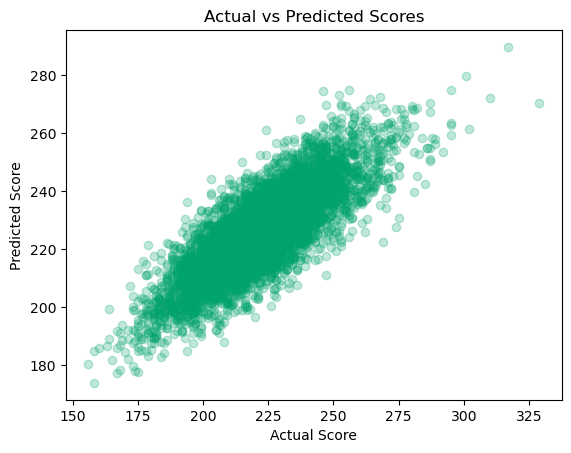

In [63]:
import matplotlib.pyplot as plt

plt.scatter(yValid, mlpPred, marker="o", alpha=0.25, color="#00A36C")
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')
plt.show()


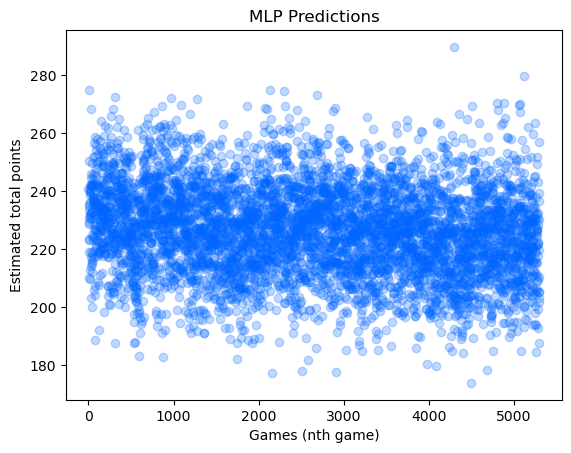

<Figure size 640x480 with 0 Axes>

In [64]:
plt.style.context("ggplot")
plt.scatter(range(len(mlpPred)), mlpPred, marker="o", alpha=0.25,color = "#0066ff")
plt.xlabel("Games (nth game)")
plt.ylabel("Estimated total points")
plt.title("MLP Predictions")
fig6 = plt.figure();

Average Error of model: 3.5664407937094365


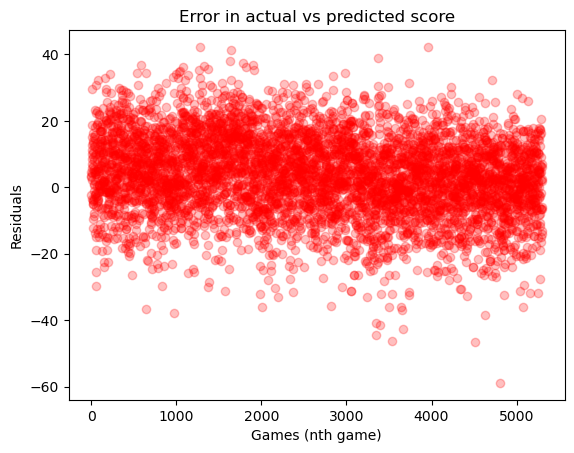

<Figure size 640x480 with 0 Axes>

In [65]:
residuals = []
for i in range(len(mlpPred)):
    residuals.append((mlpPred[i] - yValid.iloc[i]))
print ("Average Error of model:",sum(residuals)/len(residuals))
plt.style.context("ggplot")
plt.scatter(range(len(residuals)), residuals, marker="o", alpha=0.25, color="#ff0000")
plt.xlabel("Games (nth game)")
plt.ylabel("Residuals")
plt.title("Error in actual vs predicted score")
fig7 = plt.figure();